In [3]:
from itertools import combinations

import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from metrics import tpr, fpr, f1, precision, npv, accuracy, selection_rate
from metrics import tpr_torch, fpr_torch, precision_torch, npv_torch, accuracy_torch, f1_torch, selection_rate_torch
from pipeline import FairDataset, FairPipeline, tpr_score, fpr_score, npv_score, selection_rate_score


dataset_name = 'Synthetic'
sensitive_attribute_name = 'A'
classifiers = {'xgb': xgb.XGBClassifier()}
classifier_config_path = 'configs/classifier_config.yml'
metrics = {
    'tpr': tpr_score,
    'fpr': fpr_score,
    'precision': precision_score,
    'recall': recall_score,
    'npv': npv_score,
    'accuracy': accuracy_score,
    'f1': f1_score,
    'selection_rate': selection_rate_score
}
metric_functions = {
    'tpr': tpr,
    'fpr': fpr,
    'precision': precision,
    'npv': npv,
    'selection_rate': selection_rate
}

torch_metric_functions = {
    'tpr': tpr_torch,
    'fpr': fpr_torch,
    'precision': precision_torch,
    'npv': npv_torch,
    'selection_rate': selection_rate_torch
}

global_metrics_map = {
    'f1': f1,
    'precision': precision,
    'npv': npv,
    'accuracy': accuracy,
}

torch_global_metrics_map = {
    'f1': f1_torch,
    'precision': precision_torch,
    'npv': npv_torch,
    'accuracy': accuracy_torch,
}

type_approx = 'torch'

if type_approx == 'torch':
    global_metrics_map = torch_global_metrics_map
    metric_functions = torch_metric_functions

global_metric_setting = 'accuracy'
lambda_list = [0.1, 1.0, 3.0, 5.0, 7.5, 10.0, 20.0]

n_classes = 2
n_features = 15
group_sizes = [500, 500, 500, 500, 500]
class_separation_scores = [0.5, 0.5, 0.5, 0.5, 0.5]
assert(len(group_sizes) == len(class_separation_scores))

### Runtime comparison
The following table shows the runtime of the different implementations. 

Processing combinations: 100%|██████████| 2500/2500 [00:00<00:00, 3138.92it/s]


Best objective value: 0.5650698493001254
Best thresholds: {0: -2.654612679520854, 1: -2.2407540622442617}
Epsilon differences: {0: {1: array([0.03333333, 0.        , 0.19183673, 0.        , 0.02      ])}, 1: {0: array([0.03333333, 0.        , 0.19183673, 0.        , 0.02      ])}}


Processing combinations: 100%|██████████| 10000/10000 [00:02<00:00, 3489.60it/s]


Best objective value: 0.16666666666666674
Best thresholds: {0: -2.9213504834946074, 1: -2.0417348684242906}
Epsilon differences: {0: {1: array([0., 0., 0., 0., 0.])}, 1: {0: array([0., 0., 0., 0., 0.])}}


Processing combinations: 100%|██████████| 22500/22500 [00:06<00:00, 3371.20it/s]


Best objective value: 0.33668358910121365
Best thresholds: {0: -2.3765261101435677, 1: -2.4529566564078475}
Epsilon differences: {0: {1: array([0.01219512, 0.        , 0.08362416, 0.        , 0.00666667])}, 1: {0: array([0.01219512, 0.        , 0.08362416, 0.        , 0.00666667])}}


Processing combinations: 100%|██████████| 40000/40000 [00:11<00:00, 3333.78it/s]


Best objective value: 0.20579058967777392
Best thresholds: {0: -2.9069882193216414, 1: -2.553921134901955}
Epsilon differences: {0: {1: array([0.        , 0.00040016, 0.0201005 , 0.        , 0.        ])}, 1: {0: array([0.        , 0.00040016, 0.0201005 , 0.        , 0.        ])}}


Processing combinations: 100%|██████████| 62500/62500 [00:22<00:00, 2773.33it/s]

Best objective value: 0.19868563016903595
Best thresholds: {0: -2.9403886346642802, 1: -2.246889333984605}
Epsilon differences: {0: {1: array([0.   , 0.   , 0.016, 0.   , 0.   ])}, 1: {0: array([0.   , 0.   , 0.016, 0.   , 0.   ])}}
Number of points in the epsilon net: 46
Adjusted max_error: 0.01
Number of points in data: 100
Number of CPU cores available: 8
Number of running processes: 702
Enters pool


Submits futures


Threshold Combinations: 100%|██████████| 2116/2116 [00:02<00:00, 801.67it/s] 


Best objective value: 0.8658476205087875
Best thresholds: {0: 0.0, 1: 0.13333333333333333}
Epsilon differences: {0: {1: array([0.05      , 0.01666667, 0.11153846, 0.10833333, 0.12      ])}, 1: {0: array([0.05      , 0.01666667, 0.11153846, 0.10833333, 0.12      ])}}
Number of points in the epsilon net: 41
Adjusted max_error: 0.01
Number of points in data: 200
Number of CPU cores available: 8
Number of running processes: 702
Enters pool
Submits futures


Threshold Combinations: 100%|██████████| 1681/1681 [00:02<00:00, 665.64it/s] 


Best objective value: 0.5319213443528976
Best thresholds: {0: 0.05, 1: 0.45}
Epsilon differences: {0: {1: array([0.06      , 0.08      , 0.08841463, 0.0579096 , 0.01      ])}, 1: {0: array([0.06      , 0.08      , 0.08841463, 0.0579096 , 0.01      ])}}
Number of points in the epsilon net: 38
Adjusted max_error: 0.01
Number of points in data: 300
Number of CPU cores available: 8
Number of running processes: 702
Enters pool
Submits futures


Threshold Combinations: 100%|██████████| 1444/1444 [00:02<00:00, 674.61it/s] 


Best objective value: 0.5228366523471555
Best thresholds: {0: 0.0, 1: 0.32432432432432434}
Epsilon differences: {0: {1: array([0.02403676, 0.02559913, 0.11267606, 0.06329114, 0.        ])}, 1: {0: array([0.02403676, 0.02559913, 0.11267606, 0.06329114, 0.        ])}}
Number of points in the epsilon net: 37
Adjusted max_error: 0.01
Number of points in data: 400
Number of CPU cores available: 8
Number of running processes: 702
Enters pool
Submits futures


Threshold Combinations: 100%|██████████| 1369/1369 [00:02<00:00, 618.38it/s] 


Best objective value: 0.30768619993376
Best thresholds: {0: 0.0, 1: 0.027777777777777776}
Epsilon differences: {0: {1: array([0.00040016, 0.01060424, 0.02525253, 0.0150495 , 0.005     ])}, 1: {0: array([0.00040016, 0.01060424, 0.02525253, 0.0150495 , 0.005     ])}}
Number of points in the epsilon net: 35
Adjusted max_error: 0.01
Number of points in data: 500
Number of CPU cores available: 8
Number of running processes: 702
Enters pool
Submits futures


Threshold Combinations: 100%|██████████| 1225/1225 [00:01<00:00, 660.54it/s] 


Best objective value: 0.31657084639287925
Best thresholds: {0: 0.0, 1: 0.14705882352941177}
Epsilon differences: {0: {1: array([0.00620959, 0.00064016, 0.01281859, 0.01846324, 0.004     ])}, 1: {0: array([0.00620959, 0.00064016, 0.01281859, 0.01846324, 0.004     ])}}
Initialization 0, Epoch 0, Loss: 0.5073792934417725
Initialization 0, Epoch 10, Loss: 0.49467140436172485
Initialization 0, Epoch 20, Loss: 0.49436429142951965
Early stopping triggered at initialization 0, epoch 29
Initialization 1, Epoch 0, Loss: 0.6268098950386047
Initialization 1, Epoch 10, Loss: 0.6783055067062378
Early stopping triggered at initialization 1, epoch 20
Initialization 2, Epoch 0, Loss: 0.6634213924407959
Initialization 2, Epoch 10, Loss: 0.6804063320159912
Initialization 2, Epoch 20, Loss: 0.6803335547447205
Early stopping triggered at initialization 2, epoch 27
Initialization 3, Epoch 0, Loss: 0.4961603283882141
Initialization 3, Epoch 10, Loss: 0.5043162703514099
Initialization 3, Epoch 20, Loss: 0.504

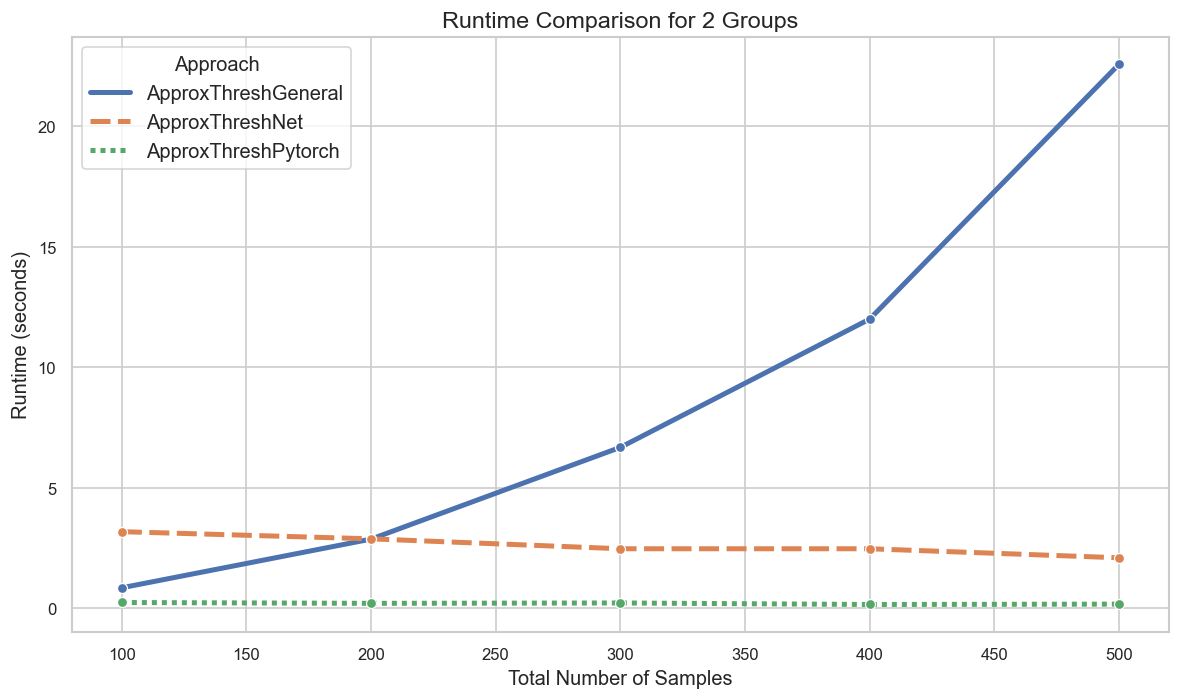

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import time
import matplotlib.pyplot as plt
import seaborn as sns

from approx_thresh_light import ApproxThresholdNet, ApproxThresholdGeneral
from approx_thresh_pytorch_light import ApproxThresholdPytorch

FIGSIZE_ONE_COLUMN = (10, 6)
DPI = 120
TITLE_FONTSIZE = 14
LABEL_FONTSIZE = 12
TICKS_FONTSIZE = 10
SUPER_TITLE_FONTSIZE = 16
LINE_WIDTH = 3
MARKER_1 = 'o'
PLOT_STYLE = "whitegrid"

sns.set(style=PLOT_STYLE)
plt.rcParams.update({'figure.figsize': FIGSIZE_ONE_COLUMN,
                     'figure.dpi': DPI,
                     'axes.titlesize': TITLE_FONTSIZE,
                     'axes.labelsize': LABEL_FONTSIZE,
                     'xtick.labelsize': TICKS_FONTSIZE,
                     'ytick.labelsize': TICKS_FONTSIZE,
                     'lines.linewidth': LINE_WIDTH,
                     'lines.markersize': LINE_WIDTH * 2}) 


name_map = {
    'ApproxThreshGeneral': 'general',
    'ApproxThreshNet': 'net',
    'ApproxThreshPytorch': 'torch'
}

metrics = {
    'tpr': tpr_score,
    'fpr': fpr_score,
    'precision': precision_score,
    'recall': recall_score,
    'npv': npv_score,
    'accuracy': accuracy_score,
    'f1': f1_score,
    'selection_rate': selection_rate_score
}
metric_functions = {
    'tpr': tpr,
    'fpr': fpr,
    'precision': precision,
    'npv': npv,
    'selection_rate': selection_rate
}

torch_metric_functions = {
    'tpr': tpr_torch,
    'fpr': fpr_torch,
    'precision': precision_torch,
    'npv': npv_torch,
    'selection_rate': selection_rate_torch
}

global_metrics_map = {
    'f1': f1,
    'precision': precision,
    'npv': npv,
    'accuracy': accuracy,
}
    
def run_experiment(approach, total_samples, num_groups, name, n_features=10):
    start_time = time.time()
    
    n_samples_per_group = total_samples // num_groups
    remainder = total_samples % num_groups
    samples_per_group = [n_samples_per_group + (1 if i < remainder else 0) for i in range(num_groups)]
    
    X, y = make_classification(n_samples=total_samples, n_features=n_features, n_classes=2, random_state=42)
    
    A = np.concatenate([np.full(samples_per_group[i], i) for i in range(num_groups)])
    
    type_approx = name_map[name]
    m_f = metric_functions if type_approx != 'torch' else torch_metric_functions
    
    approx = approach(metric_functions=m_f)
    approx.fit(y_prob=X[:, 0], y=y, A=A)
    
    end_time = time.time()
    return end_time - start_time


total_samples_range = [100, 200, 300, 400, 500] 
num_groups_list = [2] 
approaches = [ApproxThresholdGeneral, ApproxThresholdNet, ApproxThresholdPytorch]
approach_names = ['ApproxThreshGeneral', 'ApproxThreshNet', 'ApproxThreshPytorch']

for num_groups in num_groups_list:
    results = []
    for approach, name in zip(approaches, approach_names):
        for total_samples in total_samples_range:
            runtime = run_experiment(approach, total_samples, num_groups, name)
            results.append({'Approach': name, 'Total Samples': total_samples, 'Runtime': runtime})
    
    results_df = pd.DataFrame(results)
    # results_df.to_pickle(f'runtime_comparison_{num_groups}_groups.pkl')
    
    plt.figure(figsize=FIGSIZE_ONE_COLUMN, dpi=DPI)
    sns.lineplot(data=results_df, x='Total Samples', y='Runtime', hue='Approach', marker=MARKER_1, style='Approach', linewidth=LINE_WIDTH)
    plt.title(f'Runtime Comparison for {num_groups} Groups', fontsize=TITLE_FONTSIZE)
    plt.xlabel('Total Number of Samples', fontsize=LABEL_FONTSIZE)
    plt.ylabel('Runtime (seconds)', fontsize=LABEL_FONTSIZE)
    plt.xticks(fontsize=TICKS_FONTSIZE)
    plt.yticks(fontsize=TICKS_FONTSIZE)
    plt.legend(title='Approach', fontsize=LABEL_FONTSIZE)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


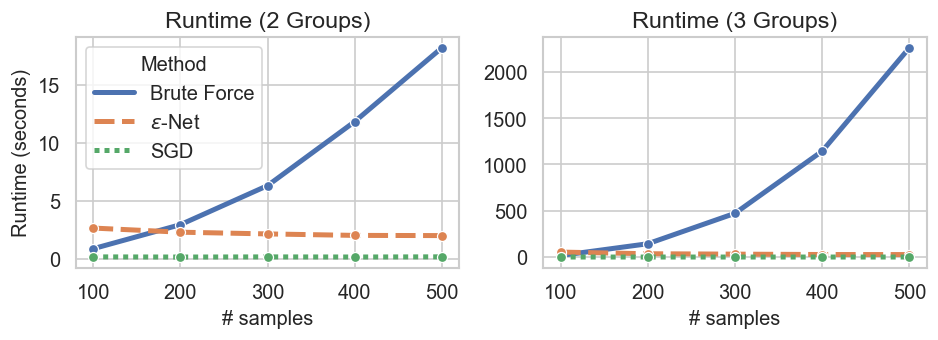

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

FIGSIZE_TWO_COLUMN = (8, 3)
DPI = 120
TITLE_FONTSIZE = 14
LABEL_FONTSIZE = 12
TICKS_FONTSIZE = 12
SUPER_TITLE_FONTSIZE = 16
LINE_WIDTH = 3
MARKER_1 = 'o'
PLOT_STYLE = "whitegrid"

df_2_groups = pd.read_pickle('runtime_comparison_2_groups.pkl')
df_3_groups = pd.read_pickle('runtime_comparison_3_groups.pkl')

sns.set(style=PLOT_STYLE)
plt.rcParams.update({
    'figure.dpi': DPI,
    'axes.titlesize': TITLE_FONTSIZE,
    'axes.labelsize': LABEL_FONTSIZE,
    'xtick.labelsize': TICKS_FONTSIZE,
    'ytick.labelsize': TICKS_FONTSIZE,
    'lines.linewidth': LINE_WIDTH,
    'lines.markersize': LINE_WIDTH * 2
})

plt.figure(figsize=FIGSIZE_TWO_COLUMN, dpi=DPI)
plt.subplots_adjust(wspace=0.3)

plt.subplot(1, 2, 1)
sns.lineplot(data=df_2_groups, x='Total Samples', y='Runtime', hue='Approach', marker=MARKER_1, style='Approach', linewidth=LINE_WIDTH)
plt.title('Runtime (2 Groups)', fontsize=TITLE_FONTSIZE)
plt.xlabel('# samples', fontsize=LABEL_FONTSIZE)
plt.ylabel('Runtime (seconds)', fontsize=LABEL_FONTSIZE)
plt.xticks(fontsize=TICKS_FONTSIZE)
plt.yticks(fontsize=TICKS_FONTSIZE)
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Brute Force', '$\\epsilon$-Net', 'SGD']
plt.legend(handles=handles, labels=labels, title='Method', fontsize=LABEL_FONTSIZE)
plt.grid(True)

plt.subplot(1, 2, 2)
sns.lineplot(data=df_3_groups, x='Total Samples', y='Runtime', hue='Approach', marker=MARKER_1, style='Approach', linewidth=LINE_WIDTH)
plt.title('Runtime (3 Groups)', fontsize=TITLE_FONTSIZE)
plt.xlabel('# samples', fontsize=LABEL_FONTSIZE)
plt.ylabel('')
plt.xticks(fontsize=TICKS_FONTSIZE)
plt.yticks(fontsize=TICKS_FONTSIZE)
plt.legend(title='Method', fontsize=LABEL_FONTSIZE).remove()

plt.tight_layout()
# plt.show()
# save plot as pdf
plt.savefig('runtime_comparison.pdf')
